In [1]:
#Nama: Muhammad Farid Febriansyah
#Username: faridval
#Email: faridmuhammad.1402@gmail.com

In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files


In [4]:
base_dir = 'rockpaperscissors'
data_dir = os.path.join(base_dir, 'rps-cv-images')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)

os.makedirs(train_dir)
os.makedirs(validation_dir)

categories = ['rock', 'paper', 'scissors']

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, test_size=0.40, random_state=42)

    train_category_dir = os.path.join(train_dir, category)
    validation_category_dir = os.path.join(validation_dir, category)

    os.makedirs(train_category_dir)
    os.makedirs(validation_category_dir)

    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))
    for image in val_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(validation_category_dir, image))


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [7]:
import time
start_time = time.time()

# Menetapkan waktu pelatihan maksimal 25 menit (1500 detik)
max_epochs = 25
max_training_time = 1500  # 25 menit

class TimeLimitCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if time.time() - start_time > max_training_time:
            self.model.stop_training = True

history = model.fit(
    train_generator,
    steps_per_epoch=41,  # 1314 images = batch_size * steps
    epochs=max_epochs,
    validation_data=validation_generator,
    validation_steps=28,  # 874 images = batch_size * steps
    verbose=2,
    callbacks=[TimeLimitCallback()]
)

end_time = time.time()
training_time = end_time - start_time
print(f'Total training time: {training_time:.2f} seconds')


Epoch 1/25
41/41 - 19s - loss: 0.9915 - accuracy: 0.4756 - val_loss: 0.4530 - val_accuracy: 0.8002 - 19s/epoch - 457ms/step
Epoch 2/25
41/41 - 12s - loss: 0.5696 - accuracy: 0.7683 - val_loss: 0.2469 - val_accuracy: 0.9361 - 12s/epoch - 299ms/step
Epoch 3/25
41/41 - 12s - loss: 0.4711 - accuracy: 0.8163 - val_loss: 0.2345 - val_accuracy: 0.9338 - 12s/epoch - 300ms/step
Epoch 4/25
41/41 - 14s - loss: 0.4192 - accuracy: 0.8445 - val_loss: 0.2085 - val_accuracy: 0.9543 - 14s/epoch - 345ms/step
Epoch 5/25
41/41 - 12s - loss: 0.3208 - accuracy: 0.8910 - val_loss: 0.1133 - val_accuracy: 0.9680 - 12s/epoch - 301ms/step
Epoch 6/25
41/41 - 14s - loss: 0.2776 - accuracy: 0.9040 - val_loss: 0.0776 - val_accuracy: 0.9829 - 14s/epoch - 345ms/step
Epoch 7/25
41/41 - 12s - loss: 0.1879 - accuracy: 0.9337 - val_loss: 0.0876 - val_accuracy: 0.9795 - 12s/epoch - 287ms/step
Epoch 8/25
41/41 - 12s - loss: 0.1529 - accuracy: 0.9474 - val_loss: 0.0956 - val_accuracy: 0.9795 - 12s/epoch - 293ms/step
Epoch 9/

Saving j3c7JHbJwmnOq6cu.png to j3c7JHbJwmnOq6cu.png
1/1 [==============================] - 0s 399ms/step
j3c7JHbJwmnOq6cu.png
scissors


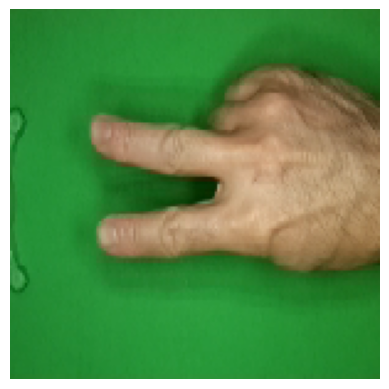

In [8]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  plt.figure()

  imgplot = plt.imshow(img)
  plt.axis('off')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=32)
  print(fn)
  if classes[0,0]==1:
   print('papper')
  elif classes[0,1]==1:
    print('rock')
  else:
   print('scissors')